In [1]:
import os
import geopandas as gpd
import pandas as pd
from progressbar import progressbar as pbar
import glob
import numpy as np
import rasterio
import ee
from geetiles import gee, utils
from rlxutils import subplots
import matplotlib.pyplot as plt

In [2]:
ee.Initialize()

In [3]:
basedir = "/opt/earthdata/chipsets"
dataset_name = 's2-2022'

files = glob.glob(f"{basedir}/*/{dataset_name}/*.tif")
chipsets = np.unique([file.split("/")[-3] for file in files])


In [4]:
chipset = np.random.choice(chipsets)
chipset = '235492c72fa62_partitions_aschips_299de3d3ec673'
chipset_files = [f for f in files if chipset in f]
len(chipset_files)

163

In [5]:
z = gpd.read_file(f"{basedir}/{chipset}.geojson")
z01 = z[z.group.isin(['0','1'])]
z.shape, z01.shape

((1729, 4), (175, 4))

In [6]:
z01.explore()

In [50]:
chipset_file = np.random.choice(chipset_files)
chipset_file = '/opt/earthdata/chipsets/235492c72fa62_partitions_aschips_299de3d3ec673/s1grd-2022/13ad3c3b94b4d.tif'
identifier = chipset_file.split("/")[-1].split(".")[0]
c = z[z.identifier==identifier].iloc[0]
c

area_km2                                              26.204174
identifier                                        13ad3c3b94b4d
group                                                         1
geometry      POLYGON ((-80.50356533440062 -4.60685715866411...
Name: 763, dtype: object

In [51]:
z[z.identifier==identifier].explore()

In [58]:
dataset_name = 's2-2020'
dataset = utils.get_dataset_definition(dataset_name)
t = gee.GEETile(c.geometry, pixels_lonlat=(512,512), dataset_definition=dataset, dtype=dataset.get_dtype())

In [59]:
!rm -f *.tif *.msk
t.get_tile()
!ls -lash *.tif

11M -rw-r--r-- 1 rlx rlx 11M Jun  2 03:08 geetile_13ad3c3b94b4d.tif


In [60]:
import os
import rasterio
folder = '.'
fname = [f for f in os.listdir('.') if f.endswith('.tif')][0]


with rasterio.open(f"{folder}/{fname}") as f:
    x = f.read()
    d = f.descriptions
    p = f.profile.copy()

In [61]:
x.shape, x.dtype

((40, 512, 512), dtype('uint8'))

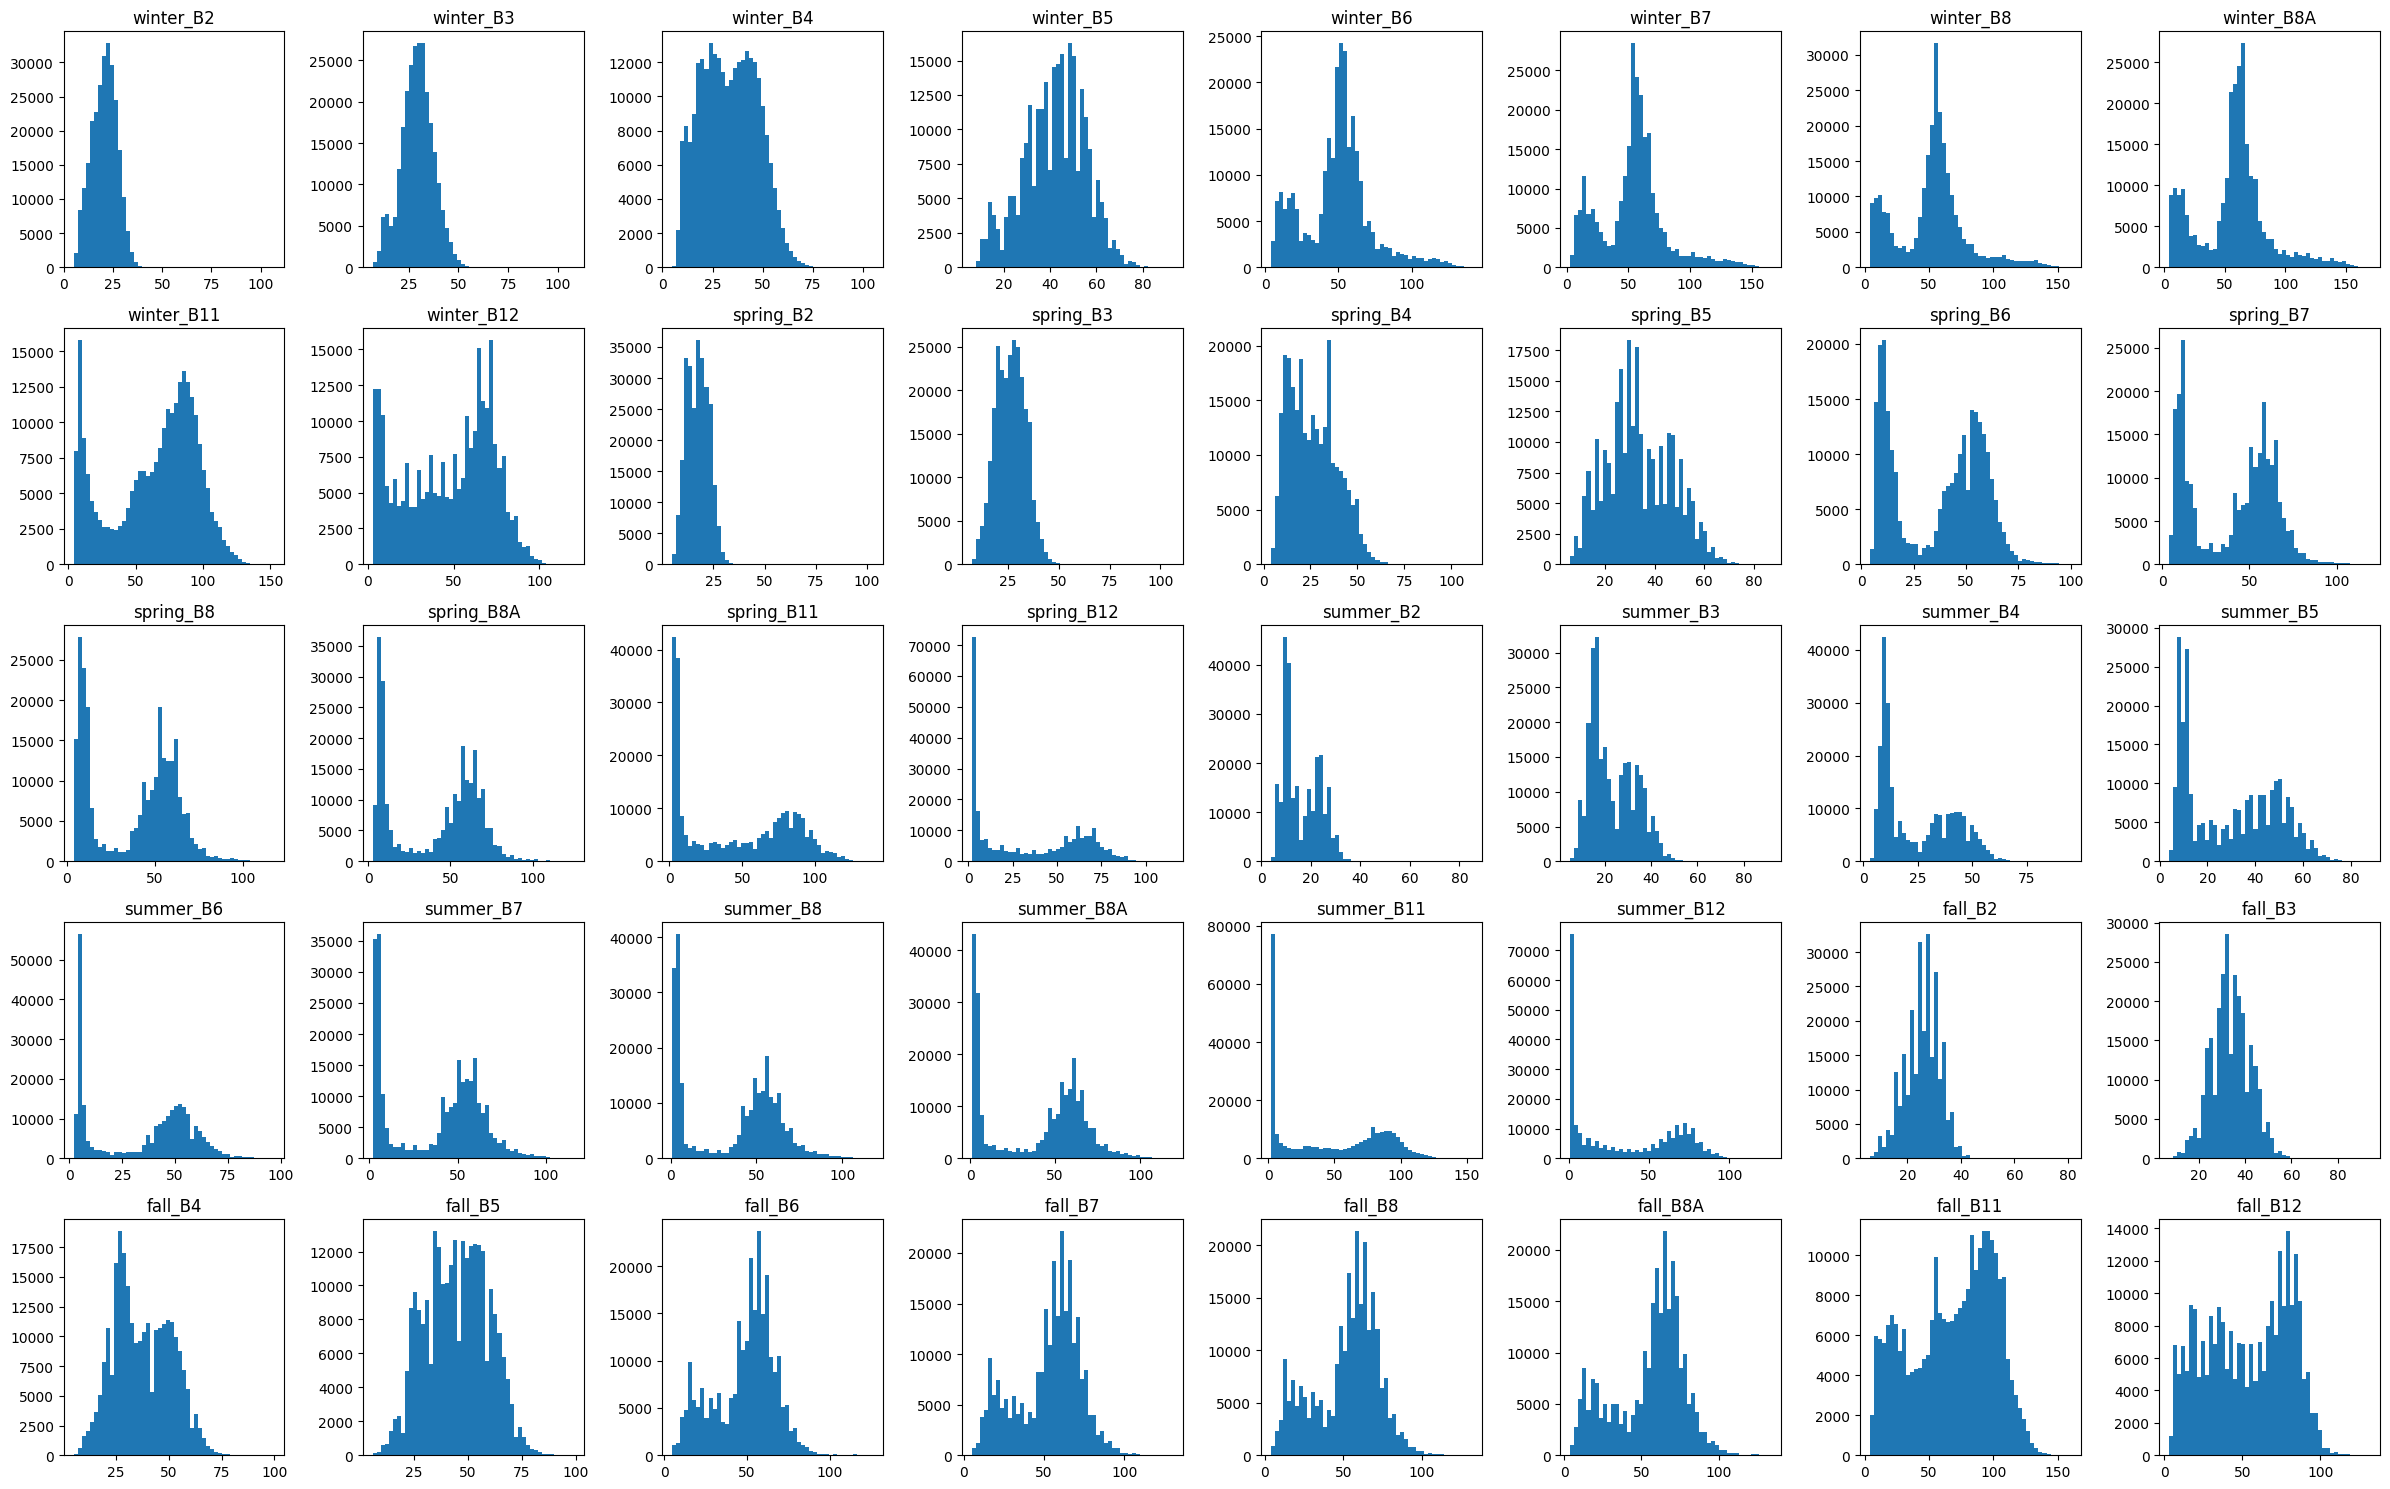

In [62]:
for ax,i in subplots(len(d), n_cols=8):
    plt.hist(x[i].flatten(), bins=50);
    plt.title(d[i])

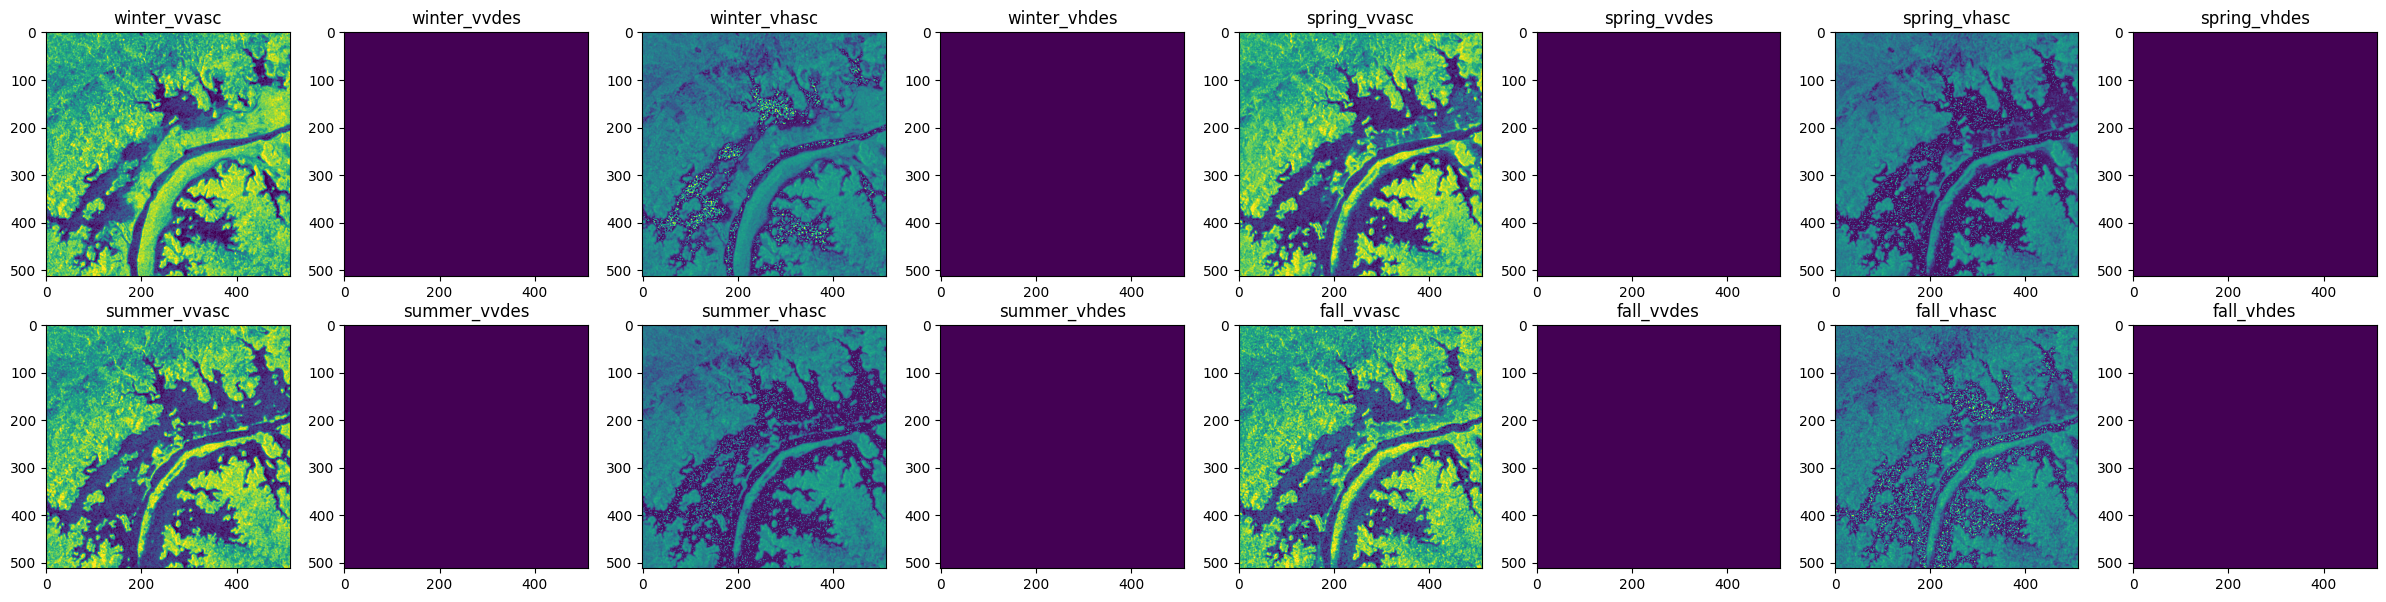

In [57]:
for ax,i in subplots(len(d), n_cols=8):
    a,b = np.percentile(x[i], (1,99))
    plt.imshow(x[i], vmin=a, vmax=b)
    plt.title(d[i])

# in case there are rgb channels

/var/tmp/ipykernel_832546/2423886905.py:9: RuntimeWarning: invalid value encountered in divide
  xs = (xs-a)/(b-a)


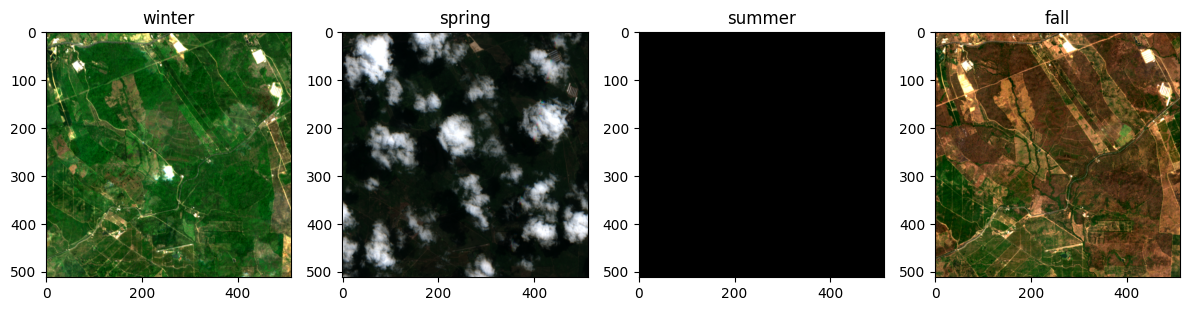

In [39]:
for ax,season in subplots(['winter', 'spring', 'summer', 'fall']):

    b4idx = np.argwhere(np.r_[list(d)] == f"{season}_B4")[0,0]
    b3idx = np.argwhere(np.r_[list(d)] == f"{season}_B3")[0,0]
    b2idx = np.argwhere(np.r_[list(d)] == f"{season}_B2")[0,0]
    xs = x[[b4idx, b3idx, b2idx]]
    xs = np.transpose(xs, [1,2,0]) / 255
    a,b = np.percentile(xs, (1,99))
    xs = (xs-a)/(b-a)
    xs[xs<0]=0
    xs[xs>1]=1
    plt.imshow(xs)
    plt.title(season)

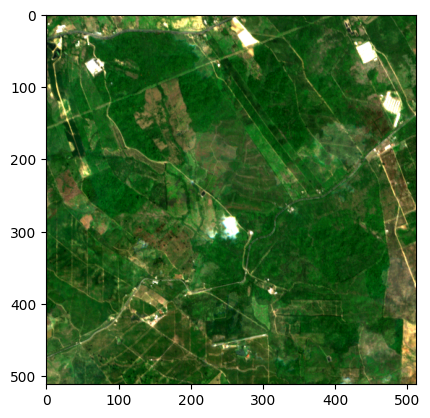

In [38]:

b4idx = np.argwhere(np.r_[list(d)] == f"{season}_B4")[0,0]
b3idx = np.argwhere(np.r_[list(d)] == f"{season}_B3")[0,0]
b2idx = np.argwhere(np.r_[list(d)] == f"{season}_B2")[0,0]
xs = x[[b4idx, b3idx, b2idx]]
xs = np.transpose(xs, [1,2,0]) / 255
a,b = np.percentile(xs, (1,99))
xs = (xs-a)/(b-a)
xs[xs<0]=0
xs[xs>1]=1
plt.imshow(xs)

In [35]:
xs

array([[[14, 19, 14],
        [13, 18, 12],
        [11, 17, 12],
        ...,
        [ 9, 19, 10],
        [ 9, 18, 10],
        [ 9, 18,  9]],

       [[14, 19, 13],
        [12, 19, 11],
        [ 9, 18, 11],
        ...,
        [10, 18, 10],
        [10, 18,  9],
        [10, 18, 10]],

       [[14, 18, 13],
        [11, 19, 11],
        [10, 18, 10],
        ...,
        [10, 18, 10],
        [10, 18,  9],
        [10, 18, 10]],

       ...,

       [[24, 27, 18],
        [20, 23, 16],
        [21, 24, 17],
        ...,
        [25, 23, 15],
        [27, 24, 16],
        [28, 24, 17]],

       [[27, 27, 19],
        [23, 26, 18],
        [22, 25, 17],
        ...,
        [25, 24, 17],
        [25, 23, 17],
        [26, 24, 17]],

       [[27, 27, 18],
        [23, 26, 17],
        [20, 24, 15],
        ...,
        [28, 25, 17],
        [26, 24, 17],
        [26, 24, 17]]], dtype=uint8)